# Projeto Pokemon!
### Projeto utilizando uma base de dados do anime Pokemon
##### A ideia inicial é utilizar essa base para fazer uma filtragem dos pokemons com menor e maior status total e os com os menores e maiores HP, Ataque e Defesa.

### Importando as bibliotecas que utilizarei

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import*
from pyspark.sql import functions as func

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Fazendo a leitura do CSV e corrigindo as colunas que vinheram com tipo STRING para INT

In [2]:
#lendo o csv
pokemon = spark.read.csv('/home/anthony/Projeto Pokemon/Pokemon.csv', header= True)
pokemon.show()
pokemon

+---+--------------------+------+------+-----+---+------+-------+-----+-----+-----+----------+---------+
|  #|                Name|Type 1|Type 2|Total| HP|Attack|Defense|SpAtk|SpDef|Speed|Generation|Legendary|
+---+--------------------+------+------+-----+---+------+-------+-----+-----+-----+----------+---------+
|  1|           Bulbasaur| Grass|Poison|  318| 45|    49|     49|   65|   65|   45|         1|    False|
|  2|             Ivysaur| Grass|Poison|  405| 60|    62|     63|   80|   80|   60|         1|    False|
|  3|            Venusaur| Grass|Poison|  525| 80|    82|     83|  100|  100|   80|         1|    False|
|  3|VenusaurMega Venu...| Grass|Poison|  625| 80|   100|    123|  122|  120|   80|         1|    False|
|  4|          Charmander|  Fire|  NULL|  309| 39|    52|     43|   60|   50|   65|         1|    False|
|  5|          Charmeleon|  Fire|  NULL|  405| 58|    64|     58|   80|   65|   80|         1|    False|
|  6|           Charizard|  Fire|Flying|  534| 78|    8

DataFrame[#: string, Name: string, Type 1: string, Type 2: string, Total: string, HP: string, Attack: string, Defense: string, SpAtk: string, SpDef: string, Speed: string, Generation: string, Legendary: string]

In [3]:
#corrigindo tipo das colunas
pokemon = pokemon.withColumn("Total", pokemon["Total"].cast(IntegerType()))
pokemon = pokemon.withColumn("HP", pokemon["HP"].cast(IntegerType()))
pokemon = pokemon.withColumn("Attack", pokemon["Attack"].cast(IntegerType()))
pokemon = pokemon.withColumn("Defense", pokemon["Defense"].cast(IntegerType()))
pokemon = pokemon.withColumn("SpAtk", pokemon["SpAtk"].cast(IntegerType()))
pokemon = pokemon.withColumn("SpDef", pokemon["SpDef"].cast(IntegerType()))
pokemon = pokemon.withColumn("Speed", pokemon["Speed"].cast(IntegerType()))
pokemon = pokemon.withColumn("Generation", pokemon["Generation"].cast(IntegerType()))

pokemon

DataFrame[#: string, Name: string, Type 1: string, Type 2: string, Total: int, HP: int, Attack: int, Defense: int, SpAtk: int, SpDef: int, Speed: int, Generation: int, Legendary: string]

### Realizando os tratamentos no necessarios para apresentação dos gráficos.

In [4]:
# Agrupando pelo tipo 1 dos pokemons e realizando assim a soma do total e ordenando em forma decrescente.
    # Modificando o DF de sparkDF para PandasDF
p2 = pokemon.groupBy("Type 1").agg(sum("Total")).orderBy(func.col("sum(Total)").desc()).toPandas()

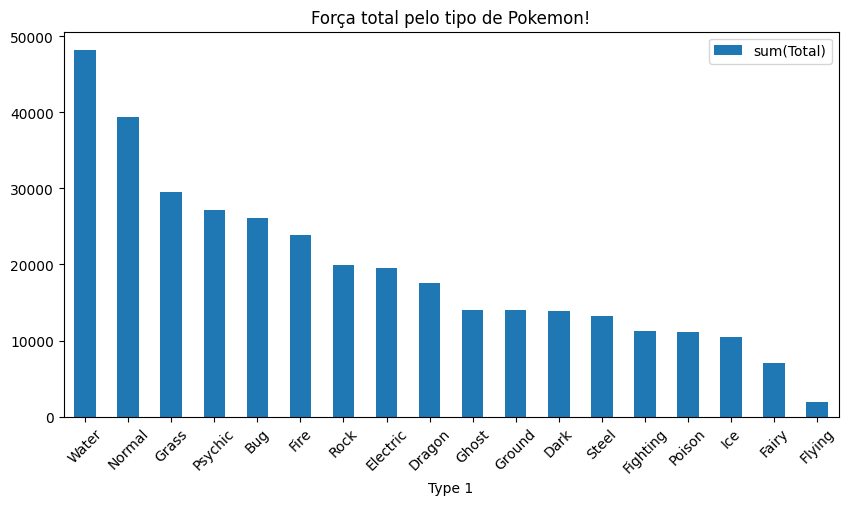

In [5]:
# Utilizando o DF modificado em Pandas para juntamento do MatPlotLIB fazer a apresentação do gráfico em barra

p2.plot(kind="bar", x="Type 1", figsize=[10,5],)
plt.xticks(rotation=45)

plt.title("Força total pelo tipo de Pokemon!")
plt.savefig('Força total pelo tipo de Pokemon!.png')
plt.show()

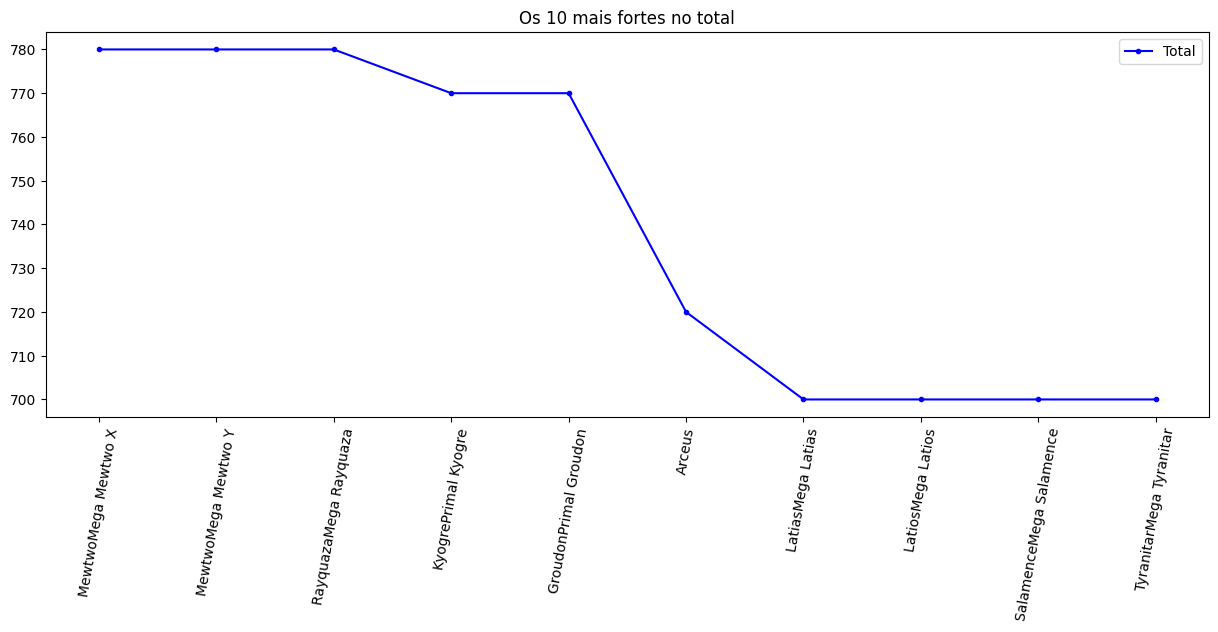

In [7]:
# Filtrando os pokemons mais fortes
high = pokemon.orderBy(func.col("Total").desc()).limit(10)

# Ordenando por total em ordem decrescente
high_ = high.select("Name","HP","Attack","Defense","Total").orderBy(func.col("Total").desc()).toPandas()

plt.figure(figsize=(15,5))
plt.title("Os 10 mais fortes no total")
plt.plot(high_["Name"],high_["Total"], 'b.-' ,label="Total")
plt.legend()
plt.savefig('Os 10 mais fortes no total.png')

plt.xticks(rotation=80)
plt.show()

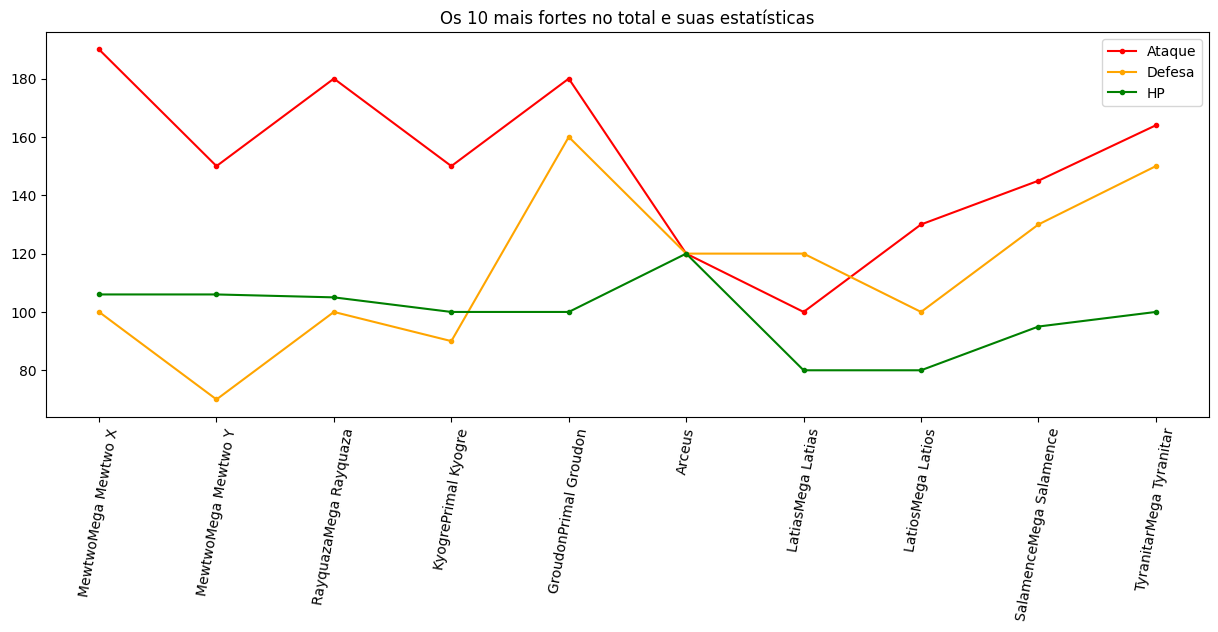

In [8]:
# Reaproveitando o df anterior dos pokemons mais fortes para apresentar as suas estatísticas.

# Ordenando por total em ordem decrescente

plt.figure(figsize=(15,5))
plt.title("Os 10 mais fortes no total e suas estatísticas")
plt.plot(high_["Name"],high_["Attack"], 'r.-' ,label="Ataque")
plt.plot(high_["Name"],high_["Defense"], '.-', color='#FFA500' ,label="Defesa")
plt.plot(high_["Name"],high_["HP"], 'g.-',label="HP")
plt.legend()
plt.savefig('Os 10 mais fortes no total e suas estatísticas.png')

plt.xticks(rotation=80)
plt.show()

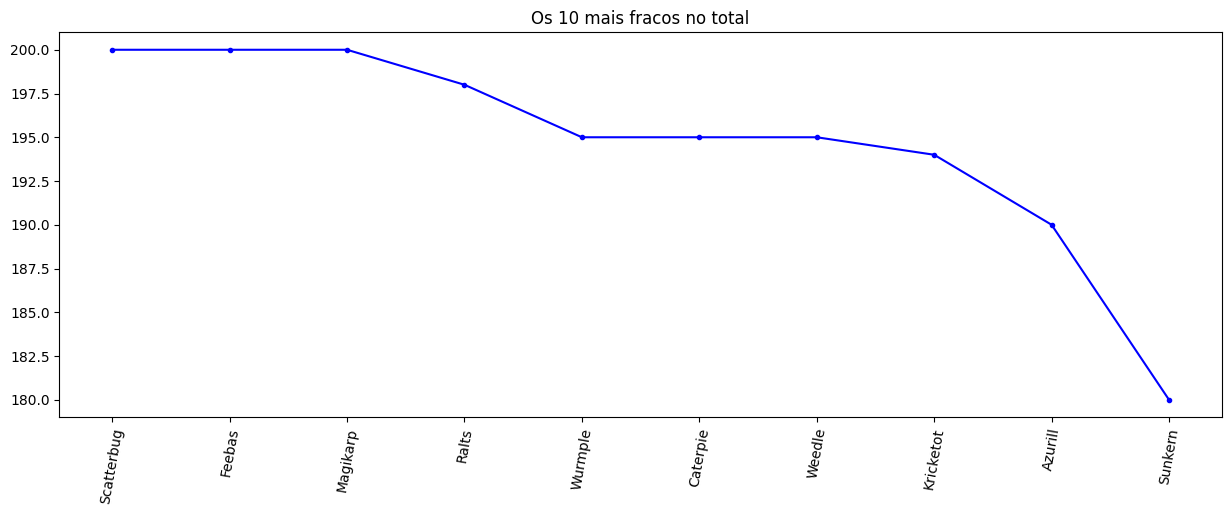

In [9]:
# Filtrando os pokemons mais fracos no total
low = pokemon.orderBy(func.col("Total")).limit(10)

# Ordenando por total em ordem decrescente
low_ = low.select("Name","HP","Attack","Defense","Total").orderBy(func.col("Total").desc()).toPandas()

plt.figure(figsize=(15,5))
plt.title("Os 10 mais fracos no total")
plt.plot(low_["Name"],low_["Total"], 'b.-' ,label="Total")
plt.savefig('Os 10 mais fracos no total.png')

plt.xticks(rotation=80)
plt.show()

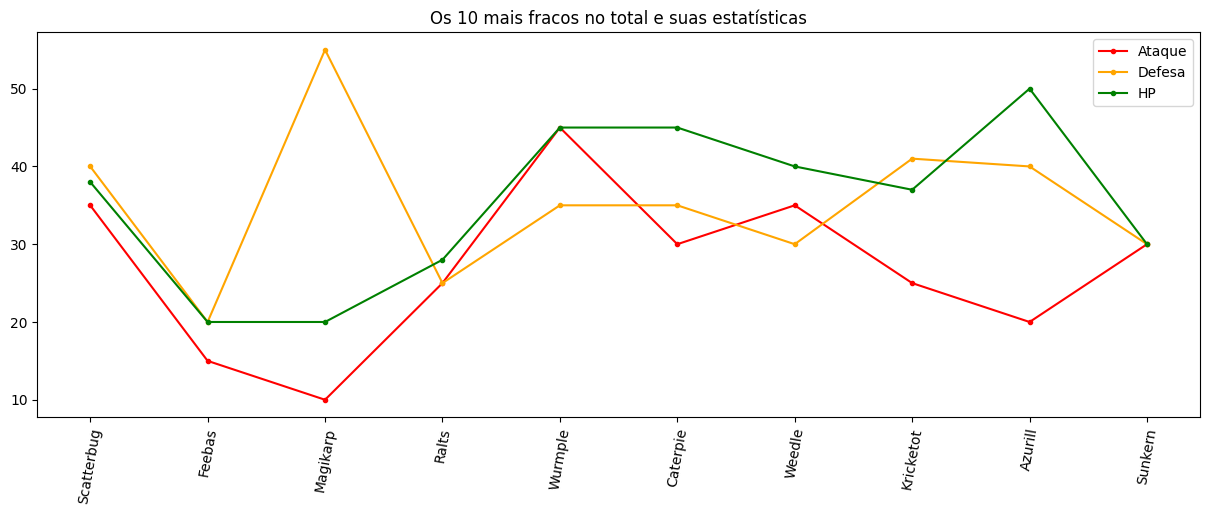

In [10]:
# Reaproveitando o df anterior dos pokemons mais fracos para apresentar as suas estatísticas.

# Ordenando por total em ordem decrescente

plt.figure(figsize=(15,5))
plt.title("Os 10 mais fracos no total e suas estatísticas")
plt.plot(low_["Name"],low_["Attack"], 'r.-' ,label="Ataque")
plt.plot(low_["Name"],low_["Defense"], '.-', color='#FFA500' ,label="Defesa")
plt.plot(low_["Name"],low_["HP"], 'g.-',label="HP")
plt.legend()
plt.savefig('Os 10 mais fracos no total e suas estatísticas.png')

plt.xticks(rotation=80)
plt.show()

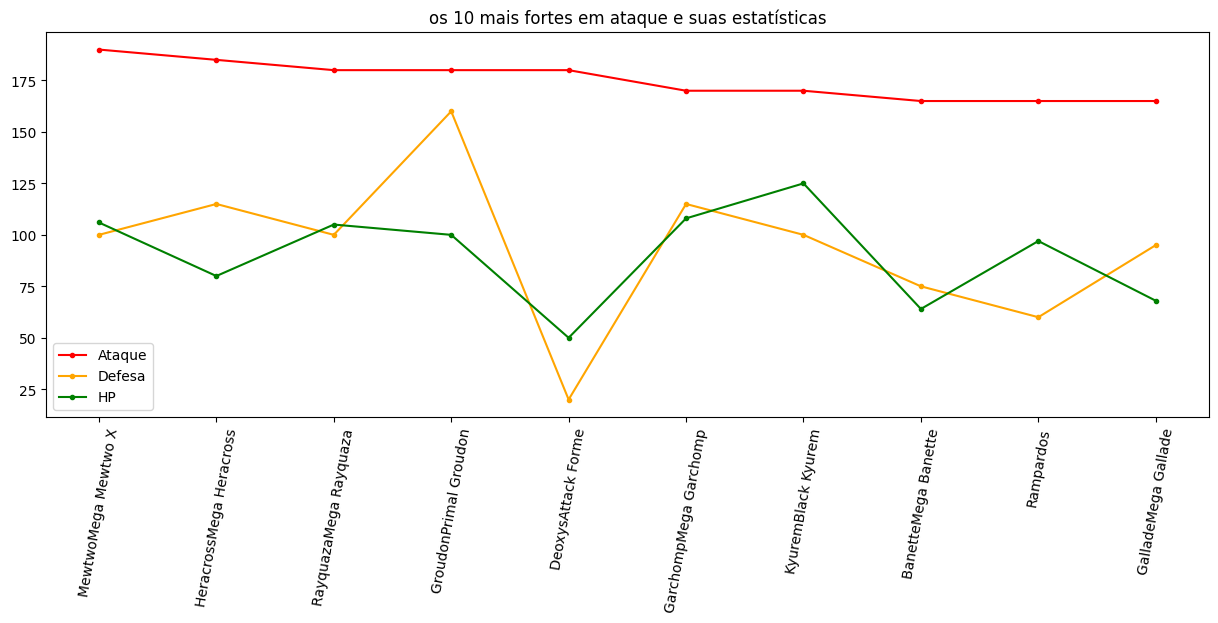

In [11]:
# Filtrando os pokemons mais fortes em Ataque da base de dados principal Pokemon.csv
# para apresentar as suas estatísticas.
atH = pokemon.orderBy(func.col("Attack").desc()).limit(10)

# Ordenando por total em ordem decrescente
atH_ = atH.select("Name","HP","Attack","Defense","Total").orderBy(func.col("Attack").desc()).toPandas()

plt.figure(figsize=(15,5))
plt.title("os 10 mais fortes em ataque e suas estatísticas")
plt.plot(atH_["Name"],atH_["Attack"], 'r.-' ,label="Ataque")
plt.plot(atH_["Name"],atH_["Defense"], '.-', color='#FFA500' ,label="Defesa")
plt.plot(atH_["Name"],atH_["HP"], 'g.-',label="HP")
plt.legend()
plt.savefig('os 10 mais fortes em ataque e suas estatísticas.png')

plt.xticks(rotation=80)
plt.show()

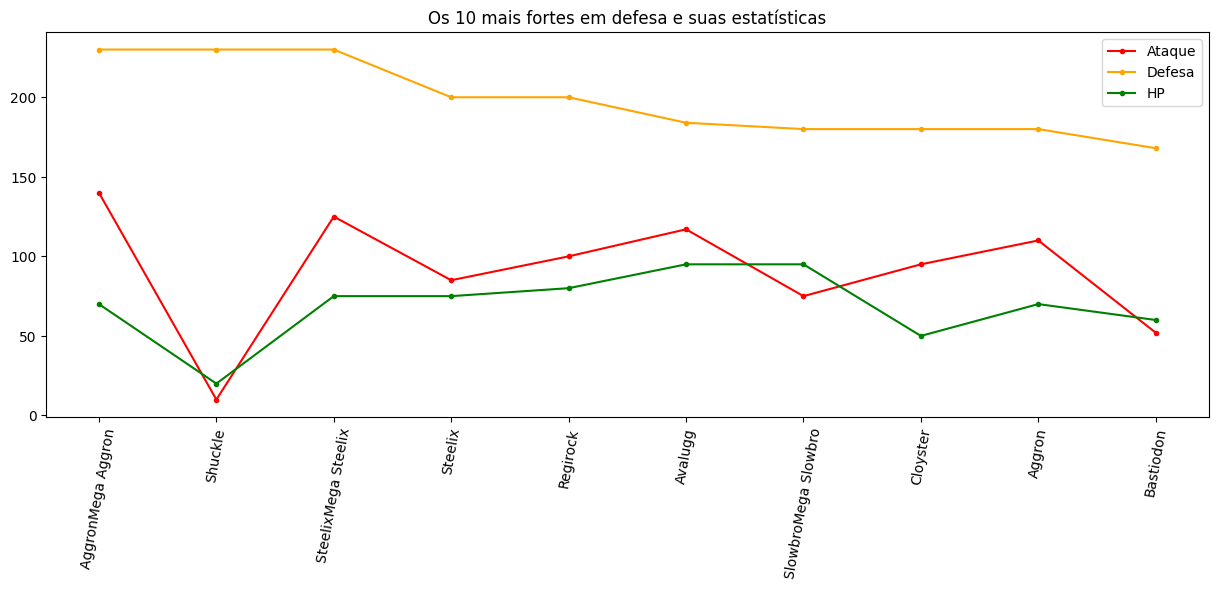

In [12]:
# Filtrando os pokemons mais fortes em Defesa da base de dados principal Pokemon.csv
# para apresentar as suas estatísticas.
dfH = pokemon.orderBy(func.col("Defense").desc()).limit(10)

# Ordenando por total em ordem decrescente
dfH_ = dfH.select("Name","HP","Attack","Defense","Total").orderBy(func.col("Defense").desc()).toPandas()

plt.figure(figsize=(15,5))
plt.title("Os 10 mais fortes em defesa e suas estatísticas")
plt.plot(dfH_["Name"],dfH_["Attack"], 'r.-' ,label="Ataque")
plt.plot(dfH_["Name"],dfH_["Defense"], '.-', color='#FFA500' ,label="Defesa")
plt.plot(dfH_["Name"],dfH_["HP"], 'g.-',label="HP")
plt.legend()
plt.savefig('Os 10 mais fortes em defesa e suas estatísticas.png')

plt.xticks(rotation=80)
plt.show()

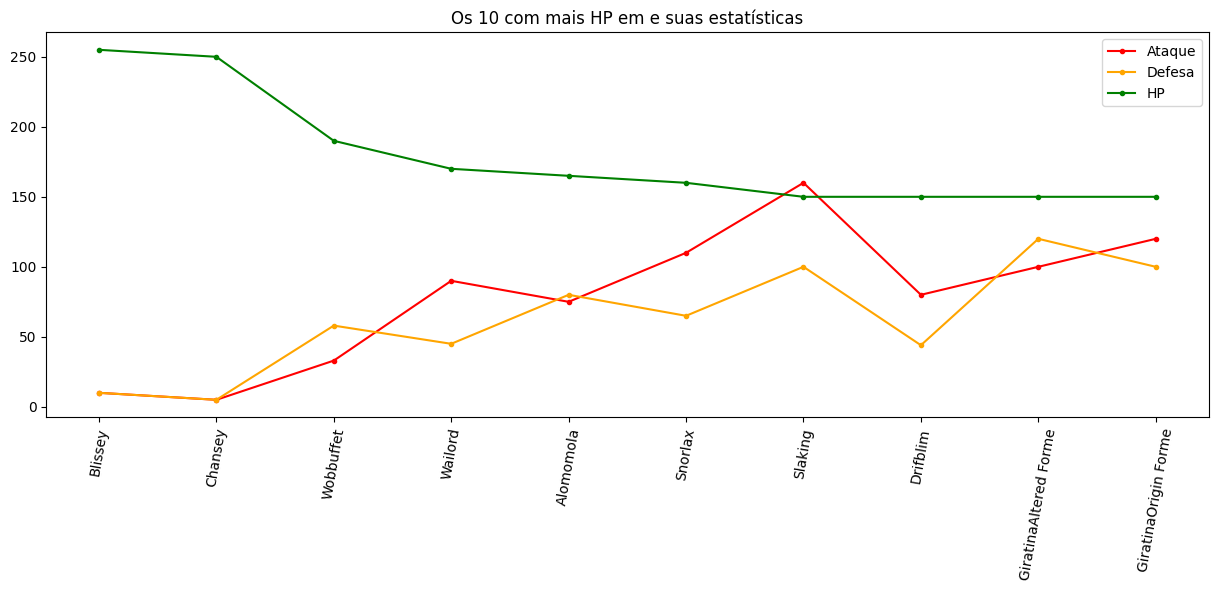

In [13]:
# Filtrando os pokemons com o maior numero em HP da base de dados principal Pokemon.csv
# para apresentar as suas estatísticas.
HPH = pokemon.orderBy(func.col("HP").desc()).limit(10)

# Ordenando por total em ordem decrescente
HPH_ = HPH.select("Name","HP","Attack","Defense","Total").orderBy(func.col("HP").desc()).toPandas()

plt.figure(figsize=(15,5))
plt.title("Os 10 com mais HP em e suas estatísticas")
plt.plot(HPH_["Name"],HPH_["Attack"], 'r.-' ,label="Ataque")
plt.plot(HPH_["Name"],HPH_["Defense"], '.-', color='#FFA500' ,label="Defesa")
plt.plot(HPH_["Name"],HPH_["HP"], 'g.-',label="HP")
plt.legend()
plt.savefig('Os 10 com mais HP em e suas estatísticas.png')

plt.xticks(rotation=80)
plt.show()

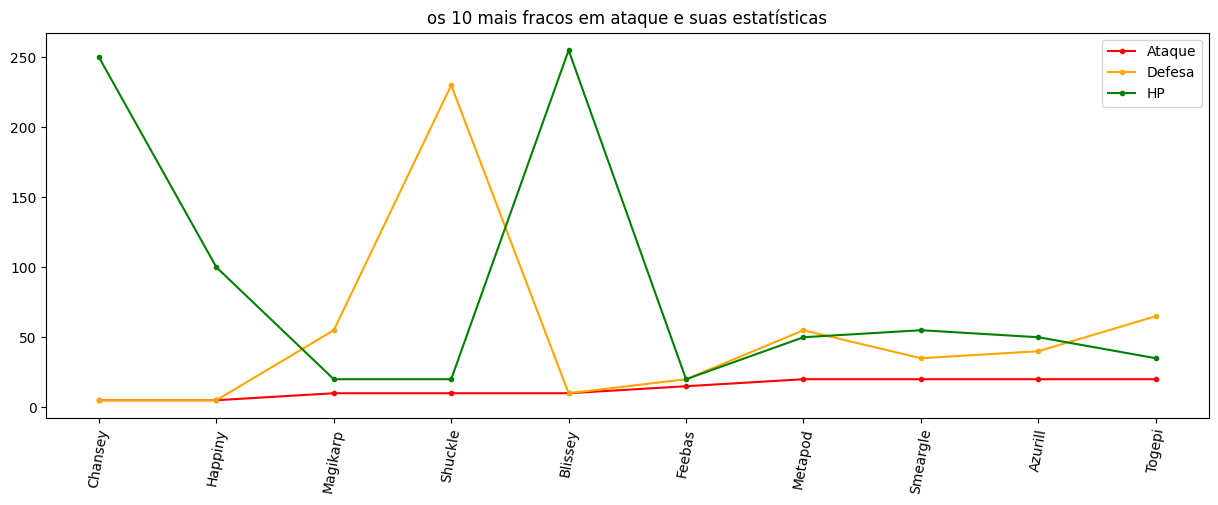

In [14]:
# Filtrando os pokemons mais fracos em Ataque da base de dados principal Pokemon.csv
# para apresentar as suas estatísticas.
atL = pokemon.orderBy(func.col("Attack")).limit(10)

# Ordenando por total em ordem decrescente
atL_ = atL.select("Name","HP","Attack","Defense","Total").orderBy(func.col("Attack")).toPandas()

plt.figure(figsize=(15,5))
plt.title("os 10 mais fracos em ataque e suas estatísticas")
plt.plot(atL_["Name"],atL_["Attack"], 'r.-' ,label="Ataque")
plt.plot(atL_["Name"],atL_["Defense"], '.-', color='#FFA500' ,label="Defesa")
plt.plot(atL_["Name"],atL_["HP"], 'g.-',label="HP")
plt.legend()
plt.savefig('os 10 mais fracos em ataque e suas estatísticas.png')

plt.xticks(rotation=80)
plt.show()

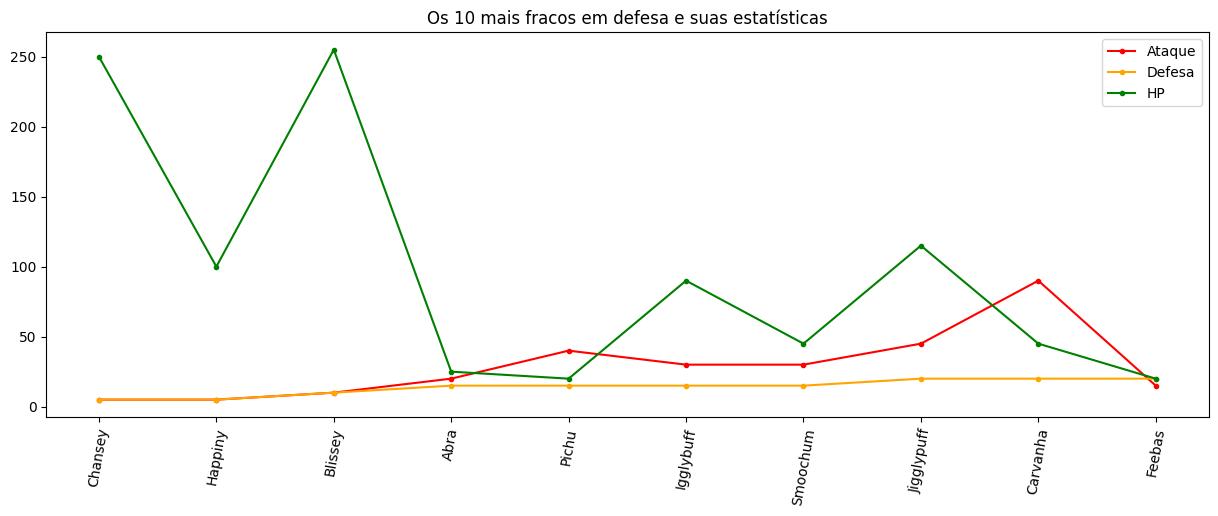

In [15]:
# Filtrando os pokemons mais fracos em defesa da base de dados principal Pokemon.csv
# para apresentar as suas estatísticas.
dfL = pokemon.orderBy(func.col("Defense")).limit(10)

# Ordenando por total em ordem decrescente
dfL_ = dfL.select("Name","HP","Attack","Defense","Total").orderBy(func.col("Defense")).toPandas()

plt.figure(figsize=(15,5))
plt.title("Os 10 mais fracos em defesa e suas estatísticas")
plt.plot(dfL_["Name"],dfL_["Attack"], 'r.-' ,label="Ataque")
plt.plot(dfL_["Name"],dfL_["Defense"], '.-', color='#FFA500' ,label="Defesa")
plt.plot(dfL_["Name"],dfL_["HP"], 'g.-',label="HP")
plt.legend()
plt.savefig('Os 10 mais fracos em defesa e suas estatísticas.png')

plt.xticks(rotation=80)
plt.show()

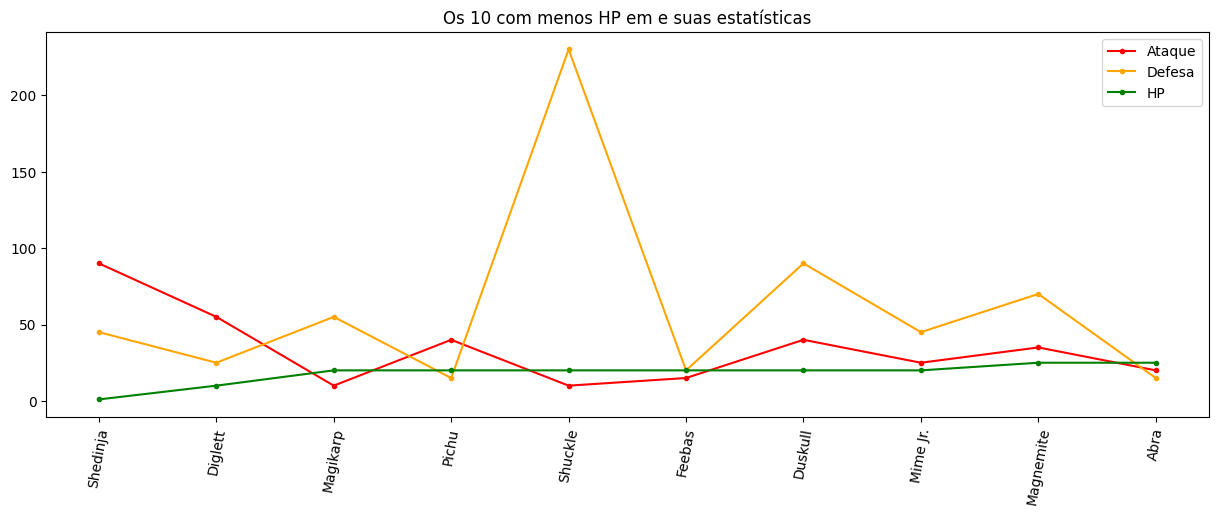

In [16]:
# Filtrando os pokemons com o menor numero em HP da base de dados principal Pokemon.csv
# para apresentar as suas estatísticas.
HPL = pokemon.orderBy(func.col("HP")).limit(10)

# Ordenando por total em ordem decrescente
HPL_ = HPL.select("Name","HP","Attack","Defense","Total").orderBy(func.col("HP")).toPandas()

plt.figure(figsize=(15,5))
plt.title("Os 10 com menos HP em e suas estatísticas")
plt.plot(HPL_["Name"],HPL_["Attack"], 'r.-' ,label="Ataque")
plt.plot(HPL_["Name"],HPL_["Defense"], '.-', color='#FFA500' ,label="Defesa")
plt.plot(HPL_["Name"],HPL_["HP"], 'g.-',label="HP")
plt.legend()
plt.savefig('Os 10 com menos HP em e suas estatísticas.png')

plt.xticks(rotation=80)
plt.show()

### Mostrando os DF completos e os filtrados que utilizamos nos gráficos

In [17]:
# DF em Spark
high.show()
# DF em Pandas
high_

+---+--------------------+-------+--------+-----+---+------+-------+-----+-----+-----+----------+---------+
|  #|                Name| Type 1|  Type 2|Total| HP|Attack|Defense|SpAtk|SpDef|Speed|Generation|Legendary|
+---+--------------------+-------+--------+-----+---+------+-------+-----+-----+-----+----------+---------+
|150| MewtwoMega Mewtwo X|Psychic|Fighting|  780|106|   190|    100|  154|  100|  130|         1|     True|
|150| MewtwoMega Mewtwo Y|Psychic|    NULL|  780|106|   150|     70|  194|  120|  140|         1|     True|
|384|RayquazaMega Rayq...| Dragon|  Flying|  780|105|   180|    100|  180|  100|  115|         3|     True|
|382| KyogrePrimal Kyogre|  Water|    NULL|  770|100|   150|     90|  180|  160|   90|         3|     True|
|383|GroudonPrimal Gro...| Ground|    Fire|  770|100|   180|    160|  150|   90|   90|         3|     True|
|493|              Arceus| Normal|    NULL|  720|120|   120|    120|  120|  120|  120|         4|     True|
|380|   LatiasMega Latias| D

,Name,HP,Attack,Defense,Total
0,MewtwoMega Mewtwo X,106,190,100,780
1,MewtwoMega Mewtwo Y,106,150,70,780
2,RayquazaMega Rayquaza,105,180,100,780
3,KyogrePrimal Kyogre,100,150,90,770
4,GroudonPrimal Groudon,100,180,160,770
5,Arceus,120,120,120,720
6,LatiasMega Latias,80,100,120,700
7,LatiosMega Latios,80,130,100,700
8,SalamenceMega Salamence,95,145,130,700
9,TyranitarMega Tyranitar,100,164,150,700


In [18]:
# DF em Spark
low.show()
# DF em Pandas
low_

+---+----------+-------+------+-----+---+------+-------+-----+-----+-----+----------+---------+
|  #|      Name| Type 1|Type 2|Total| HP|Attack|Defense|SpAtk|SpDef|Speed|Generation|Legendary|
+---+----------+-------+------+-----+---+------+-------+-----+-----+-----+----------+---------+
|191|   Sunkern|  Grass|  NULL|  180| 30|    30|     30|   30|   30|   30|         2|    False|
|298|   Azurill| Normal| Fairy|  190| 50|    20|     40|   20|   40|   20|         3|    False|
|401| Kricketot|    Bug|  NULL|  194| 37|    25|     41|   25|   41|   25|         4|    False|
|265|   Wurmple|    Bug|  NULL|  195| 45|    45|     35|   20|   30|   20|         3|    False|
| 10|  Caterpie|    Bug|  NULL|  195| 45|    30|     35|   20|   20|   45|         1|    False|
| 13|    Weedle|    Bug|Poison|  195| 40|    35|     30|   20|   20|   50|         1|    False|
|280|     Ralts|Psychic| Fairy|  198| 28|    25|     25|   45|   35|   40|         3|    False|
|664|Scatterbug|    Bug|  NULL|  200| 38

,Name,HP,Attack,Defense,Total
0,Scatterbug,38,35,40,200
1,Feebas,20,15,20,200
2,Magikarp,20,10,55,200
3,Ralts,28,25,25,198
4,Wurmple,45,45,35,195
5,Caterpie,45,30,35,195
6,Weedle,40,35,30,195
7,Kricketot,37,25,41,194
8,Azurill,50,20,40,190
9,Sunkern,30,30,30,180


In [19]:
# DF em Spark
atH.show()
# DF em Pandas
atH_

+---+--------------------+-------+--------+-----+---+------+-------+-----+-----+-----+----------+---------+
|  #|                Name| Type 1|  Type 2|Total| HP|Attack|Defense|SpAtk|SpDef|Speed|Generation|Legendary|
+---+--------------------+-------+--------+-----+---+------+-------+-----+-----+-----+----------+---------+
|150| MewtwoMega Mewtwo X|Psychic|Fighting|  780|106|   190|    100|  154|  100|  130|         1|     True|
|214|HeracrossMega Her...|    Bug|Fighting|  600| 80|   185|    115|   40|  105|   75|         2|    False|
|384|RayquazaMega Rayq...| Dragon|  Flying|  780|105|   180|    100|  180|  100|  115|         3|     True|
|383|GroudonPrimal Gro...| Ground|    Fire|  770|100|   180|    160|  150|   90|   90|         3|     True|
|386|  DeoxysAttack Forme|Psychic|    NULL|  600| 50|   180|     20|  180|   20|  150|         3|     True|
|445|GarchompMega Garc...| Dragon|  Ground|  700|108|   170|    115|  120|   95|   92|         4|    False|
|646|  KyuremBlack Kyurem| D

,Name,HP,Attack,Defense,Total
0,MewtwoMega Mewtwo X,106,190,100,780
1,HeracrossMega Heracross,80,185,115,600
2,RayquazaMega Rayquaza,105,180,100,780
3,GroudonPrimal Groudon,100,180,160,770
4,DeoxysAttack Forme,50,180,20,600
5,GarchompMega Garchomp,108,170,115,700
6,KyuremBlack Kyurem,125,170,100,700
7,BanetteMega Banette,64,165,75,555
8,Rampardos,97,165,60,495
9,GalladeMega Gallade,68,165,95,618


In [20]:
# DF em Spark
dfH.show()
# DF em Pandas
dfH_

+---+-------------------+------+-------+-----+---+------+-------+-----+-----+-----+----------+---------+
|  #|               Name|Type 1| Type 2|Total| HP|Attack|Defense|SpAtk|SpDef|Speed|Generation|Legendary|
+---+-------------------+------+-------+-----+---+------+-------+-----+-----+-----+----------+---------+
|306|  AggronMega Aggron| Steel|   NULL|  630| 70|   140|    230|   60|   80|   50|         3|    False|
|213|            Shuckle|   Bug|   Rock|  505| 20|    10|    230|   10|  230|    5|         2|    False|
|208|SteelixMega Steelix| Steel| Ground|  610| 75|   125|    230|   55|   95|   30|         2|    False|
|208|            Steelix| Steel| Ground|  510| 75|    85|    200|   55|   65|   30|         2|    False|
|377|           Regirock|  Rock|   NULL|  580| 80|   100|    200|   50|  100|   50|         3|     True|
|713|            Avalugg|   Ice|   NULL|  514| 95|   117|    184|   44|   46|   28|         6|    False|
| 80|SlowbroMega Slowbro| Water|Psychic|  590| 95|    7

,Name,HP,Attack,Defense,Total
0,AggronMega Aggron,70,140,230,630
1,Shuckle,20,10,230,505
2,SteelixMega Steelix,75,125,230,610
3,Steelix,75,85,200,510
4,Regirock,80,100,200,580
5,Avalugg,95,117,184,514
6,SlowbroMega Slowbro,95,75,180,590
7,Cloyster,50,95,180,525
8,Aggron,70,110,180,530
9,Bastiodon,60,52,168,495


In [21]:
# DF em Spark
HPH.show()
# DF em Pandas
HPH_

+---+--------------------+-------+------+-----+---+------+-------+-----+-----+-----+----------+---------+
|  #|                Name| Type 1|Type 2|Total| HP|Attack|Defense|SpAtk|SpDef|Speed|Generation|Legendary|
+---+--------------------+-------+------+-----+---+------+-------+-----+-----+-----+----------+---------+
|242|             Blissey| Normal|  NULL|  540|255|    10|     10|   75|  135|   55|         2|    False|
|113|             Chansey| Normal|  NULL|  450|250|     5|      5|   35|  105|   50|         1|    False|
|202|           Wobbuffet|Psychic|  NULL|  405|190|    33|     58|   33|   58|   33|         2|    False|
|321|             Wailord|  Water|  NULL|  500|170|    90|     45|   90|   45|   60|         3|    False|
|594|           Alomomola|  Water|  NULL|  470|165|    75|     80|   40|   45|   65|         5|    False|
|143|             Snorlax| Normal|  NULL|  540|160|   110|     65|   65|  110|   30|         1|    False|
|289|             Slaking| Normal|  NULL|  670

,Name,HP,Attack,Defense,Total
0,Blissey,255,10,10,540
1,Chansey,250,5,5,450
2,Wobbuffet,190,33,58,405
3,Wailord,170,90,45,500
4,Alomomola,165,75,80,470
5,Snorlax,160,110,65,540
6,Slaking,150,160,100,670
7,Drifblim,150,80,44,498
8,GiratinaAltered Forme,150,100,120,680
9,GiratinaOrigin Forme,150,120,100,680


In [22]:
# DF em Spark
atL.show()
# DF em Pandas
atL_

+---+--------+------+------+-----+---+------+-------+-----+-----+-----+----------+---------+
|  #|    Name|Type 1|Type 2|Total| HP|Attack|Defense|SpAtk|SpDef|Speed|Generation|Legendary|
+---+--------+------+------+-----+---+------+-------+-----+-----+-----+----------+---------+
|113| Chansey|Normal|  NULL|  450|250|     5|      5|   35|  105|   50|         1|    False|
|440| Happiny|Normal|  NULL|  220|100|     5|      5|   15|   65|   30|         4|    False|
|129|Magikarp| Water|  NULL|  200| 20|    10|     55|   15|   20|   80|         1|    False|
|213| Shuckle|   Bug|  Rock|  505| 20|    10|    230|   10|  230|    5|         2|    False|
|242| Blissey|Normal|  NULL|  540|255|    10|     10|   75|  135|   55|         2|    False|
|349|  Feebas| Water|  NULL|  200| 20|    15|     20|   10|   55|   80|         3|    False|
| 11| Metapod|   Bug|  NULL|  205| 50|    20|     55|   25|   25|   30|         1|    False|
|235|Smeargle|Normal|  NULL|  250| 55|    20|     35|   20|   45|   75

,Name,HP,Attack,Defense,Total
0,Chansey,250,5,5,450
1,Happiny,100,5,5,220
2,Magikarp,20,10,55,200
3,Shuckle,20,10,230,505
4,Blissey,255,10,10,540
5,Feebas,20,15,20,200
6,Metapod,50,20,55,205
7,Smeargle,55,20,35,250
8,Azurill,50,20,40,190
9,Togepi,35,20,65,245


In [23]:
# DF em Spark
dfL.show()
# DF em Pandas
dfL_

+---+----------+--------+-------+-----+---+------+-------+-----+-----+-----+----------+---------+
|  #|      Name|  Type 1| Type 2|Total| HP|Attack|Defense|SpAtk|SpDef|Speed|Generation|Legendary|
+---+----------+--------+-------+-----+---+------+-------+-----+-----+-----+----------+---------+
|113|   Chansey|  Normal|   NULL|  450|250|     5|      5|   35|  105|   50|         1|    False|
|440|   Happiny|  Normal|   NULL|  220|100|     5|      5|   15|   65|   30|         4|    False|
|242|   Blissey|  Normal|   NULL|  540|255|    10|     10|   75|  135|   55|         2|    False|
| 63|      Abra| Psychic|   NULL|  310| 25|    20|     15|  105|   55|   90|         1|    False|
|172|     Pichu|Electric|   NULL|  205| 20|    40|     15|   35|   35|   60|         2|    False|
|174| Igglybuff|  Normal|  Fairy|  210| 90|    30|     15|   40|   20|   15|         2|    False|
|238|  Smoochum|     Ice|Psychic|  305| 45|    30|     15|   85|   65|   65|         2|    False|
| 39|Jigglypuff|  No

,Name,HP,Attack,Defense,Total
0,Chansey,250,5,5,450
1,Happiny,100,5,5,220
2,Blissey,255,10,10,540
3,Abra,25,20,15,310
4,Pichu,20,40,15,205
5,Igglybuff,90,30,15,210
6,Smoochum,45,30,15,305
7,Jigglypuff,115,45,20,270
8,Carvanha,45,90,20,305
9,Feebas,20,15,20,200


In [24]:
# DF em Spark
HPL.show()
# DF em Pandas
HPL_

+---+---------+--------+------+-----+---+------+-------+-----+-----+-----+----------+---------+
|  #|     Name|  Type 1|Type 2|Total| HP|Attack|Defense|SpAtk|SpDef|Speed|Generation|Legendary|
+---+---------+--------+------+-----+---+------+-------+-----+-----+-----+----------+---------+
|292| Shedinja|     Bug| Ghost|  236|  1|    90|     45|   30|   30|   40|         3|    False|
| 50|  Diglett|  Ground|  NULL|  265| 10|    55|     25|   35|   45|   95|         1|    False|
|129| Magikarp|   Water|  NULL|  200| 20|    10|     55|   15|   20|   80|         1|    False|
|172|    Pichu|Electric|  NULL|  205| 20|    40|     15|   35|   35|   60|         2|    False|
|213|  Shuckle|     Bug|  Rock|  505| 20|    10|    230|   10|  230|    5|         2|    False|
|349|   Feebas|   Water|  NULL|  200| 20|    15|     20|   10|   55|   80|         3|    False|
|355|  Duskull|   Ghost|  NULL|  295| 20|    40|     90|   30|   90|   25|         3|    False|
|439| Mime Jr.| Psychic| Fairy|  310| 20

,Name,HP,Attack,Defense,Total
0,Shedinja,1,90,45,236
1,Diglett,10,55,25,265
2,Magikarp,20,10,55,200
3,Pichu,20,40,15,205
4,Shuckle,20,10,230,505
5,Feebas,20,15,20,200
6,Duskull,20,40,90,295
7,Mime Jr.,20,25,45,310
8,Magnemite,25,35,70,325
9,Abra,25,20,15,310


### Salvando os DF para poder utilizar no Power BI e desenvolver um Dashboard

In [25]:
#high.write.format("csv").save("/home/anthony/Projeto Pokemon/DFs/high" , )
high.toPandas().to_csv("/home/anthony/Projeto Pokemon/DFs/high.csv")

In [26]:
#low.write.format("csv").save("/home/anthony/Projeto Pokemon/DFs/low")
low.toPandas().to_csv("/home/anthony/Projeto Pokemon/DFs/low.csv")

In [27]:
#atH.write.format("csv").save("/home/anthony/Projeto Pokemon/DFs/atH")
atH.toPandas().to_csv("/home/anthony/Projeto Pokemon/DFs/atH.csv")

In [28]:
#dfH.write.format("csv").save("/home/anthony/Projeto Pokemon/DFs/dfH")
dfH.toPandas().to_csv("/home/anthony/Projeto Pokemon/DFs/dfH.csv")

In [29]:
#HPH.write.format("csv").save("/home/anthony/Projeto Pokemon/DFs/HPP")
HPH.toPandas().to_csv("/home/anthony/Projeto Pokemon/DFs/HPH.csv")

In [30]:
#atL.write.format("csv").save("/home/anthony/Projeto Pokemon/DFs/atL")
atL.toPandas().to_csv("/home/anthony/Projeto Pokemon/DFs/atL.csv")

In [31]:
#dfL.write.format("csv").save("/home/anthony/Projeto Pokemon/DFs/dfL")
dfL.toPandas().to_csv("/home/anthony/Projeto Pokemon/DFs/dfL.csv")

In [32]:
#HPL.write.format("csv").save("/home/anthony/Projeto Pokemon/DFs/HPL")
HPL.toPandas().to_csv("/home/anthony/Projeto Pokemon/DFs/HPL.csv")